# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/1_gluoncv_finetune/installation
     
 - Select the right requirements file and run
 
     - cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

## Dataset Directory Structure

    Parent_Directory (root)
          |
          |-----------Images (img_dir)
          |              |
          |              |------------------img1.jpg
          |              |------------------img2.jpg
          |              |------------------.........(and so on)
          |
          |
          |-----------train_labels.csv (anno_file)
          
          
## Annotation file format

           | Id         | Labels                                 |
           | img1.jpg   | x1 y1 x2 y2 label1 x1 y1 x2 y2 label2  |
           
- Labels:  xmin ymin xmax ymax label
- xmin, ymin - top left corner of bounding box
- xmax, ymax - bottom right corner of bounding box

# About the Network

1. Blog 1 on Resnet Network - https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624

2. Blog 2 on Resnet Network - https://neurohive.io/en/popular-networks/resnet/

3. Blog 3 on Resnet Network - https://cv-tricks.com/keras/understand-implement-resnets/

4. Blog 4 on Redisual blocks - https://d2l.ai/chapter_convolutional-modern/resnet.html

5. Blog 1 on SSD - https://towardsdatascience.com/review-ssd-single-shot-detector-object-detection-851a94607d11

6. Blog 2 on SSD-512 - https://medium.com/@jonathan_hui/ssd-object-detection-single-shot-multibox-detector-for-real-time-processing-9bd8deac0e06

7. Blog 3 on SSD - https://towardsdatascience.com/understanding-ssd-multibox-real-time-object-detection-in-deep-learning-495ef744fab

8. Reference Tutorial - https://gluon.mxnet.io/chapter08_computer-vision/object-detection.html

In [1]:
import os
import sys
sys.path.append("../../1_gluoncv_finetune/lib/");

In [2]:
from detector_prototype import Detector

In [3]:
gtf = Detector();

# Download Dataset

- credits: https://github.com/wujixiu/helmet-detection

- Install kaggle client using: https://github.com/Kaggle/kaggle-api
    - CMD: `pip install -U kaggle`
    

In [8]:
! kaggle datasets download -d abhishek4273/helmet-dataset -q

In [9]:
! unzip -qq helmet-dataset.zip

In [4]:
root = "helmet_dataset/";                         
img_dir = "JPEGImages/";                                                     
anno_file = "train_labels.csv";
batch_size=4;

In [5]:
gtf.Dataset(root, img_dir, anno_file, batch_size=batch_size);

In [6]:
pretrained = True;         
gpu=True;
model_name = "ssd_512_resnet50_v1_coco";  

In [7]:
gtf.Model(model_name, use_pretrained=pretrained, use_gpu=gpu);

/home/abhi/.virtualenvs/monk_obj_1_gluoncv_finetune/lib/python3.6/site-packages/mxnet/gluon/block.py:1159: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [8]:
gtf.Set_Learning_Rate(0.001);

In [9]:
epochs=3;
params_file = "saved_model.params";

In [10]:
gtf.Train(epochs, params_file);

[Epoch 0][Batch 0], Speed: 0.329 samples/sec, CrossEntropy=11.346, SmoothL1=6.389
[Epoch 0][Batch 20], Speed: 2.540 samples/sec, CrossEntropy=8.391, SmoothL1=3.102
[Epoch 0][Batch 40], Speed: 8.273 samples/sec, CrossEntropy=7.002, SmoothL1=2.464
[Epoch 0][Batch 60], Speed: 5.839 samples/sec, CrossEntropy=6.228, SmoothL1=2.270
[Epoch 0][Batch 80], Speed: 7.548 samples/sec, CrossEntropy=5.727, SmoothL1=2.125
[Epoch 0][Batch 100], Speed: 0.793 samples/sec, CrossEntropy=5.394, SmoothL1=2.040
[Epoch 0][Batch 120], Speed: 8.295 samples/sec, CrossEntropy=5.147, SmoothL1=1.983
[Epoch 0][Batch 140], Speed: 9.216 samples/sec, CrossEntropy=4.972, SmoothL1=1.926
[Epoch 0][Batch 160], Speed: 3.463 samples/sec, CrossEntropy=4.834, SmoothL1=1.889
[Epoch 0][Batch 180], Speed: 3.944 samples/sec, CrossEntropy=4.713, SmoothL1=1.844
[Epoch 0][Batch 200], Speed: 10.195 samples/sec, CrossEntropy=4.611, SmoothL1=1.819
[Epoch 0][Batch 220], Speed: 12.519 samples/sec, CrossEntropy=4.532, SmoothL1=1.771
[Epoch 

[Epoch 2][Batch 500], Speed: 8.026 samples/sec, CrossEntropy=2.517, SmoothL1=1.179
[Epoch 2][Batch 520], Speed: 4.664 samples/sec, CrossEntropy=2.514, SmoothL1=1.181
[Epoch 2][Batch 540], Speed: 8.544 samples/sec, CrossEntropy=2.517, SmoothL1=1.171
[Epoch 2][Batch 560], Speed: 9.376 samples/sec, CrossEntropy=2.512, SmoothL1=1.156
[Epoch 2][Batch 580], Speed: 8.550 samples/sec, CrossEntropy=2.498, SmoothL1=1.149
[Epoch 2][Batch 600], Speed: 2.955 samples/sec, CrossEntropy=2.497, SmoothL1=1.150
[Epoch 2][Batch 620], Speed: 8.965 samples/sec, CrossEntropy=2.492, SmoothL1=1.145
[Epoch 2][Batch 640], Speed: 5.176 samples/sec, CrossEntropy=2.497, SmoothL1=1.155
[Epoch 2][Batch 660], Speed: 9.285 samples/sec, CrossEntropy=2.495, SmoothL1=1.155
[Epoch 2][Batch 680], Speed: 7.514 samples/sec, CrossEntropy=2.496, SmoothL1=1.165
[Epoch 2][Batch 700], Speed: 10.260 samples/sec, CrossEntropy=2.490, SmoothL1=1.164
[Epoch 2][Batch 720], Speed: 7.343 samples/sec, CrossEntropy=2.488, SmoothL1=1.166


# Running Inference

In [1]:
import os
import sys
sys.path.append("../../1_gluoncv_finetune/lib/");

In [11]:
from inference_prototype import Infer

In [12]:
model_name = "ssd_512_resnet50_v1_coco";
params_file = "saved_model.params";
class_list = ["type-1", "type-2", "type-3", "type-4", "type-5"];

In [13]:
gtf = Infer(model_name, params_file, class_list, use_gpu=True);

In [14]:
img_name = "../sample_dataset/helmet_test/img1.jpg"; 
visualize = True;
thresh = 0.9;

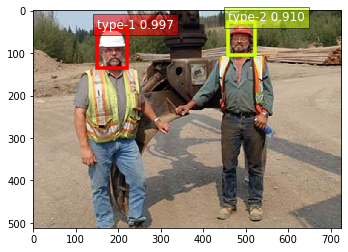

In [15]:
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

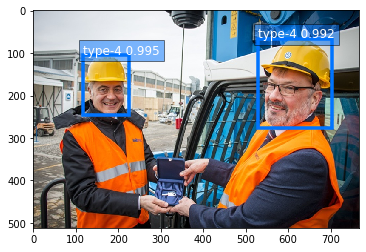

In [16]:
img_name = "../sample_dataset/helmet_test/img2.jpg"; 
visualize = True;
thresh = 0.9;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

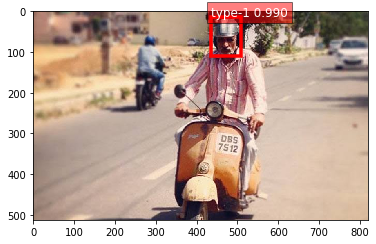

In [22]:
img_name = "../sample_dataset/helmet_test/img5.jpeg"; 
visualize = True;
thresh = 0.4;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

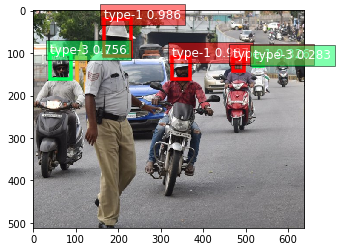

In [25]:
img_name = "../sample_dataset/helmet_test/img7.jpg"; 
visualize = True;
thresh = 0.25;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

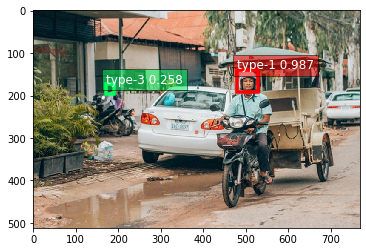

In [26]:
img_name = "../sample_dataset/helmet_test/img10.jpg"; 
visualize = True;
thresh = 0.25;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

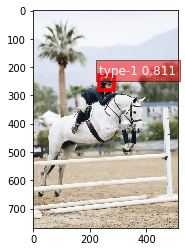

In [27]:
img_name = "../sample_dataset/helmet_test/img13.jpg"; 
visualize = True;
thresh = 0.25;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

# Author - Tessellate Imaging - https://www.tessellateimaging.com/

# Monk Library - https://github.com/Tessellate-Imaging/monk_v1

    Monk is an opensource low-code tool for computer vision and deep learning


## Monk features
   - low-code
   - unified wrapper over major deep learning framework - keras, pytorch, gluoncv
   - syntax invariant wrapper

## Enables

    - to create, manage and version control deep learning experiments
    - to compare experiments across training metrics
    - to quickly find best hyper-parameters

## At present it only supports transfer learning, but we are working each day to incorporate

    - GUI based custom model creation
    - various object detection and segmentation algorithms
    - deployment pipelines to cloud and local platforms
    - acceleration libraries such as TensorRT
    - preprocessing and post processing libraries


## To contribute to Monk AI or Monk Object Detection repository raise an issue in the git-repo or dm us on linkedin

    - Abhishek - https://www.linkedin.com/in/abhishek-kumar-annamraju/
    - Akash - https://www.linkedin.com/in/akashdeepsingh01/

